In [ ]:
#Here goes the 2 class Explainability!! Based on correct prediction only

In [1]:
!pip install shap

In [3]:
import numpy as np
import pickle

with open("shaps_values_all_full", "rb") as fp:   # Unpickling
    shap_values_all = pickle.load(fp)
    
with open("y_test_all_full", "rb") as fp:   # Unpickling
    y_test_all = pickle.load(fp)

with open("y_pred_all_full", "rb") as fp:   # Unpickling
    y_pred_all = pickle.load(fp)
    


In [4]:
print('Shape of a single SHAP elemenet in the list: ',np.shape(shap_values_all[0]))
#class,trial,1,chan,samples

print('Shape of a random y_test in the list: ',np.shape(y_test_all[0]))
print('Shape of a random y_pred in the list: ',np.shape(y_pred_all[0]))

Shape of a single SHAP elemenet in the list:  (258, 56, 1024, 1, 2)
Shape of a random y_test in the list:  (258,)
Shape of a random y_pred in the list:  (258, 2)


In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

shap_values_nt=np.concatenate( shap_values_all, axis=0 )

print('Shape of all SHAP values for NT class: ', np.shape(shap_values_nt))

y_test_all=np.concatenate( y_test_all, axis=0 )
y_pred_all=np.concatenate( y_pred_all, axis=0 )

print('Shape of all y_test array: ', np.shape(y_test_all))
print('Shape of all y_pred array: ', np.shape(y_pred_all))



Shape of all SHAP values for NT class:  (1287, 56, 1024, 1, 2)
Shape of all y_test array:  (1287,)
Shape of all y_pred array:  (1287, 2)


In [11]:
SHAPS_0=[]

# Convert `y_pred_all` to class labels
y_pred_labels = np.argmax(y_pred_all, axis=1)

for i in range(len(y_test_all)):
    if y_test_all[i] == y_pred_labels[i]:
            SHAPS_0.append(np.squeeze(shap_values_nt[i]))
print('Instances of correct 0 class: ', len(SHAPS_0))
print('A sample shape of a single SHAP after squeeze: ', np.shape(shap_values_nt[i]))

SHAPS_0=np.stack( SHAPS_0, axis=0 )
print('Converting List of Final SHAPS_0 into array:' ,np.shape(SHAPS_0))

Instances of correct 0 class:  1179
A sample shape of a single SHAP after squeeze:  (56, 1024, 1, 2)
Converting List of Final SHAPS_0 into array: (1179, 56, 1024, 2)


In [12]:
SHAPS_0 = np.mean(np.abs(SHAPS_0),axis=2)
print(np.shape(SHAPS_0))

(1179, 56, 2)


In [8]:
SHAPS_0 = np.save('SHAPS_0.npy', SHAPS_0 ,allow_pickle=True)


(1179, 56, 2)
[[[1.45540615e-04 1.45540625e-04]
  [1.06306210e-04 1.06306209e-04]
  [1.52524946e-04 1.52524958e-04]
  ...
  [1.20528107e-04 1.20528110e-04]
  [1.58495548e-04 1.58495538e-04]
  [8.44054676e-05 8.44054620e-05]]

 [[1.56763652e-04 1.56763651e-04]
  [1.20352349e-04 1.20352346e-04]
  [1.35902271e-04 1.35902275e-04]
  ...
  [1.15619093e-04 1.15619083e-04]
  [1.43321353e-04 1.43321365e-04]
  [8.41168995e-05 8.41168840e-05]]

 [[2.10473118e-04 2.10473158e-04]
  [8.84938637e-05 8.84938783e-05]
  [1.61959511e-04 1.61959528e-04]
  ...
  [1.19645657e-04 1.19645685e-04]
  [1.40473120e-04 1.40473158e-04]
  [8.38549327e-05 8.38549567e-05]]

 ...

 [[1.32113987e-04 1.32113986e-04]
  [1.45717894e-04 1.45717882e-04]
  [1.40347800e-04 1.40347809e-04]
  ...
  [7.30254441e-05 7.30254524e-05]
  [1.09280949e-04 1.09280958e-04]
  [7.76873806e-05 7.76873873e-05]]

 [[9.45573369e-05 9.45573579e-05]
  [9.62245250e-05 9.62245109e-05]
  [7.98109938e-05 7.98109670e-05]
  ...
  [4.50644682e-05 4.5064

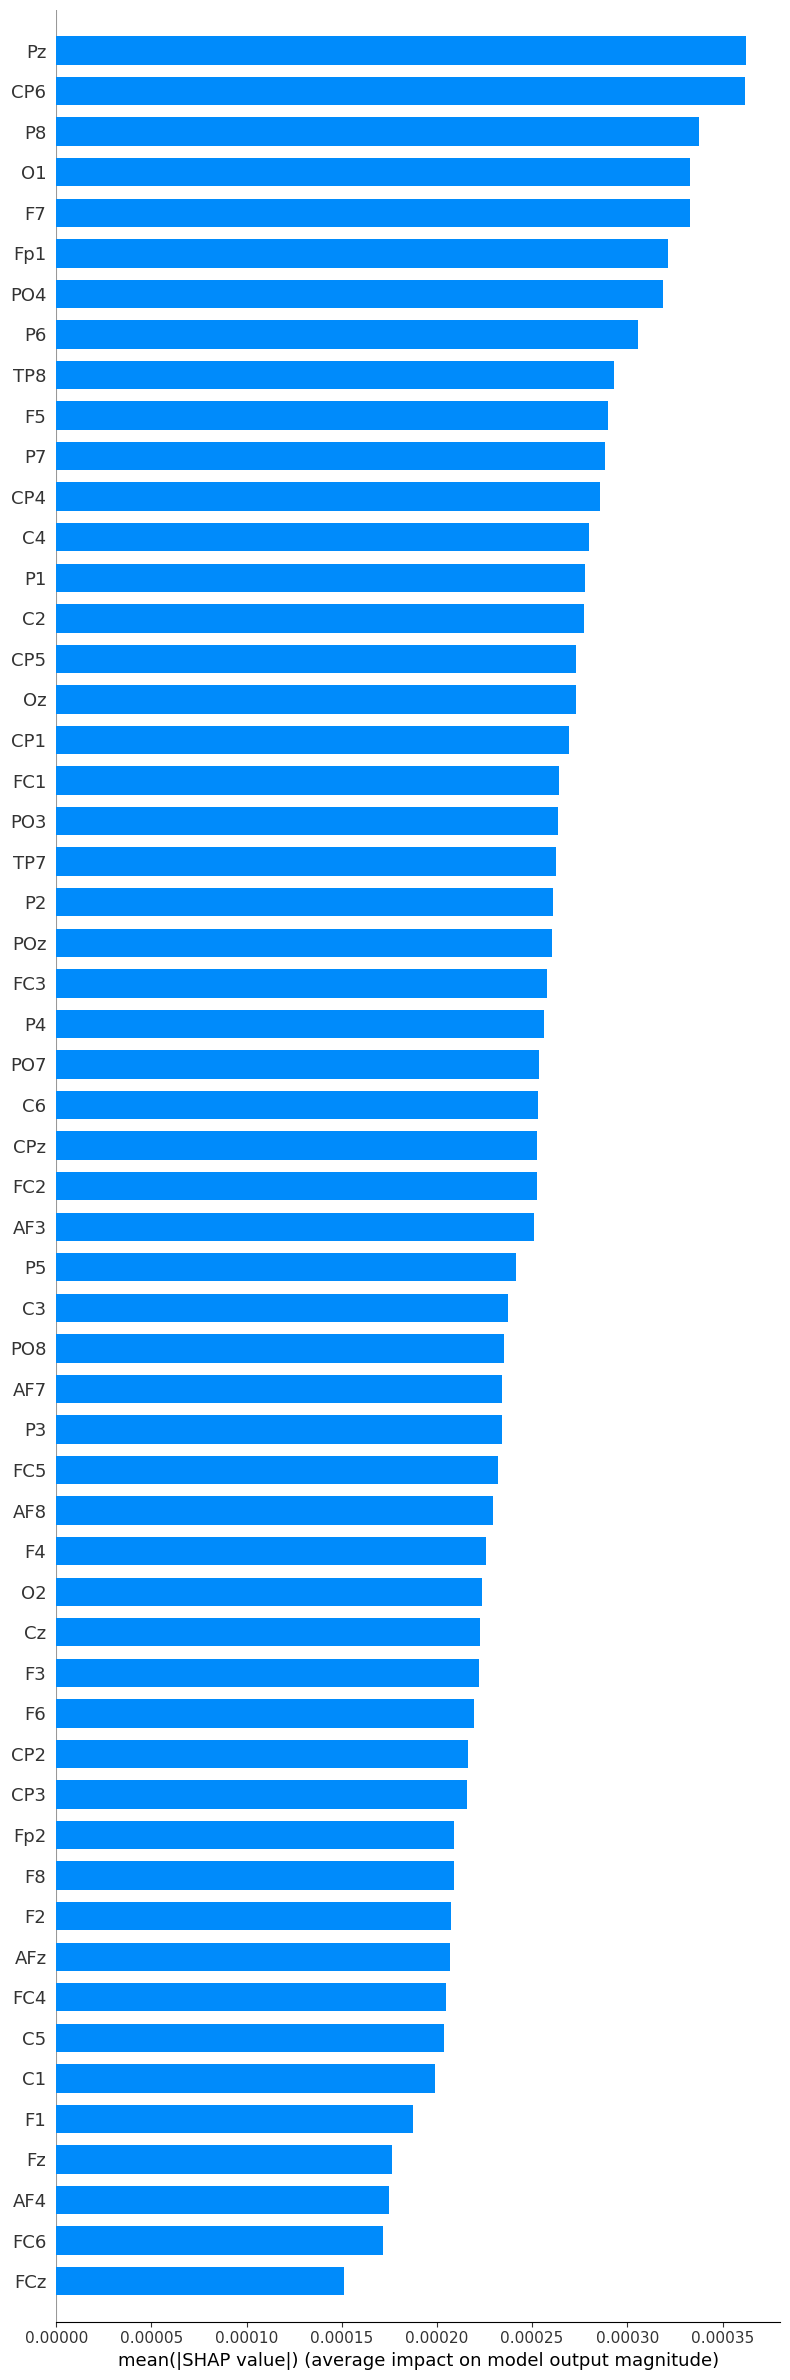

<Figure size 640x480 with 0 Axes>

In [13]:
import shap
import matplotlib.pyplot as plt


names = ['Fp1','Fz','F3','F7','FC5','FC1','C3','CP5','CP1','Pz','P3','P7','O1','Oz','O2','P4','P8','CP6','CP2','Cz','C4','FC6','FC2','F4','F8','Fp2','AF7','AF3','AFz','F1','F5','FC3','C1','C5','TP7','CP3','P1','P5','PO7','PO3','POz','PO4','PO8','P6','P2','CPz','CP4','TP8','C6','C2','FC4','F6','AF8','AF4','F2','FCz']
allCond= np.abs(SHAPS_0)
print(np.shape(allCond))
print(allCond)
fig=shap.summary_plot(np.mean(SHAPS_0,axis=2), plot_type = 'bar', feature_names = names, max_display = 56,show=True)
plt.savefig('shap.jpg', format='jpg')



In [ ]:
#Here goes the individual explainability

In [ ]:
import numpy as np
import pickle

with open("./SHAP/ATC_NTvsST/shaps_values_all", "rb") as fp:   # Unpickling
    shap_values_all = pickle.load(fp)
    
with open("./SHAP/ATC_NTvsST/y_test_all", "rb") as fp:   # Unpickling
    y_test_all = pickle.load(fp)

with open("./SHAP/ATC_NTvsST/y_pred_all", "rb") as fp:   # Unpickling
    y_pred_all = pickle.load(fp)
    


FileNotFoundError: [Errno 2] No such file or directory: './SHAP/ATC_NTvsST/shaps_values_all'

In [ ]:
print('Shape of a single SHAP elemenet in the list: ',np.shape(shap_values_all[0]))
#class,trial,1,chan,samples

print('Shape of a random y_test in the list: ',np.shape(y_test_all[0]))
print('Shape of a random y_pred in the list: ',np.shape(y_pred_all[0]))

Shape of a single SHAP elemenet in the list:  (2, 131, 1, 56, 400)
Shape of a random y_test in the list:  (131,)
Shape of a random y_pred in the list:  (131,)


In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

shap_sub=[]

nSub=16
for sub in range(nSub):
    shap_values_sub=np.array(shap_values_all[sub])
    temp=[]
    for i in range(len(y_test_all[sub])):
        if y_test_all[sub][i]== y_pred_all[sub][i]:
            if y_test_all[sub][i] == 0:
                temp.append(np.squeeze(shap_values_sub[0,i,:,:,:]))
            if y_test_all[sub][i] == 1:
                temp.append(np.squeeze(shap_values_sub[1,i,:,:,:]))
    shap_sub.append(np.mean(np.abs(np.array(temp)),axis=0))


print(np.shape(shap_sub[0]))
 


(56, 400)


In [ ]:
best_ch=[]
n=10 #how many best channels
for sub in range(nSub):
    temp=shap_sub[sub]
    temp=np.mean(np.abs(temp),axis=1)
    print((-temp).argsort()[:n])
    best_ch.append((-temp).argsort()[:n])


[26 30 24  0 52  3 25 51 33 28]
[26 52 25  3 13 30 46  0 33 53]
[26  0 25 30 52 24 37  3 28 38]
[25 26 52 30  3 51 24  4 11  0]
[ 3 26 52 30 24 25  9 51  4  0]
[24 26  3 30 52 25 51 33 21 48]
[26 52 38 25 30 13 34 24 51  3]
[52 26 30 25  0  3 44 53 28 41]
[52 26 25  3 24  4 30 51 36  0]
[24 26  3 50 52 30  4 51 25 19]
[26  3 52 30 25 24 53 38 51 33]
[26 28 52 24 25 30  3 51  4  1]
[52 26  3 30 25 51 37  0 24 33]
[26 52 25 24 33 12 51 30  0 27]
[26 25 52  3 33 24 30 21  0 23]
[52  0  3 26 30 25 51 44 24 28]


In [ ]:
np.save('best_ch.npy', best_ch ,allow_pickle=True)
